In [1]:
import json
#with open('larry.json', 'r') as F:
#with open('B54BU.json', 'r') as F:
with open('Lucas.json', 'r') as F:
    extracts = json.load(F)

In [2]:
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

In [3]:
token_dict = {}


def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems


In [4]:

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(extracts)



In [5]:
wordscores = {}

feature_names = tfidf.get_feature_names_out()

for e in extracts:
    response = tfidf.transform([e])

    for col in response.nonzero()[1]:
        word = feature_names[col]
        if not word in wordscores:
            wordscores[word] = 0.0
        wordscores[word] += response[0, col]


In [7]:
import heapq
from wordcloud import WordCloud

wordcloud = WordCloud()
new_stopwords = wordcloud.stopwords.union({'ask', 'make', 'secretary', 'hon', 'b', 'say', 'statement', 'state', 'government', 'department', 'minister', 'assessment',
'friend', 'members', 'member', 'taking', 'way', 'said', 'affairs', 'gentleman', 'use', 'number', 'now', 'given', 'simply', 'much', 's', 'ii'})
for w in new_stopwords:
    if w in wordscores:
        wordscores[w] = 0.0

In [9]:
words = list(wordscores.keys())
highest_scoring_words = heapq.nlargest(128, words, key=lambda x : wordscores[x])

In [11]:
D = {}
for w in highest_scoring_words:
    D[w] = wordscores[w]

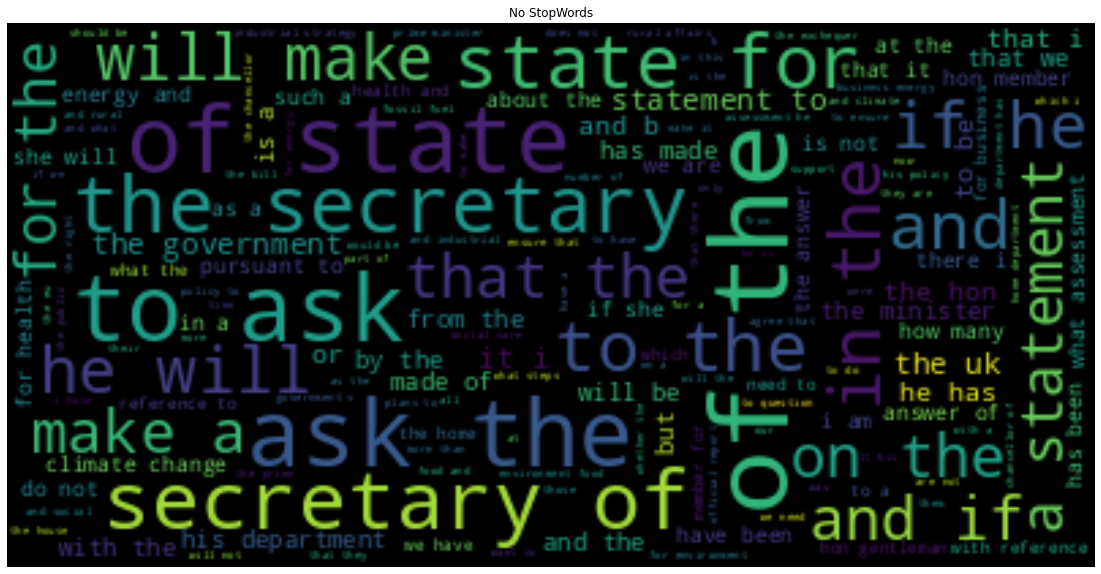

In [25]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=40, background_color="black")
wordcloud.stopwords = []
wordcloud = wordcloud.generate('\n'.join(extracts).lower())
plt.figure( figsize=(20,10) )
plt.title("No StopWords")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

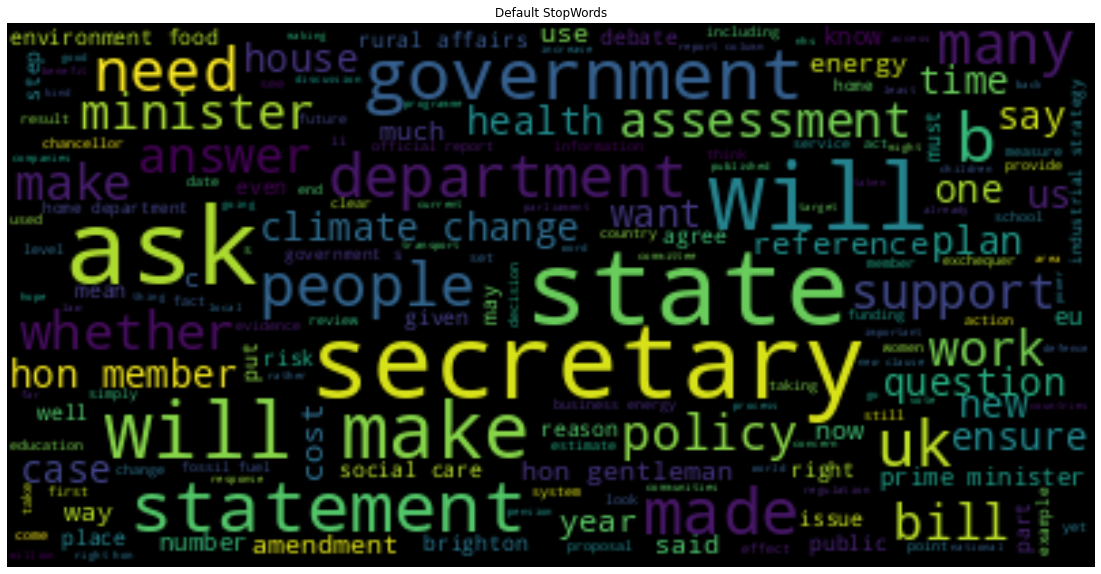

In [18]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=40, background_color="black")
wordcloud = wordcloud.generate('\n'.join(extracts).lower())
plt.figure( figsize=(20,10) )
plt.title("Default StopWords")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


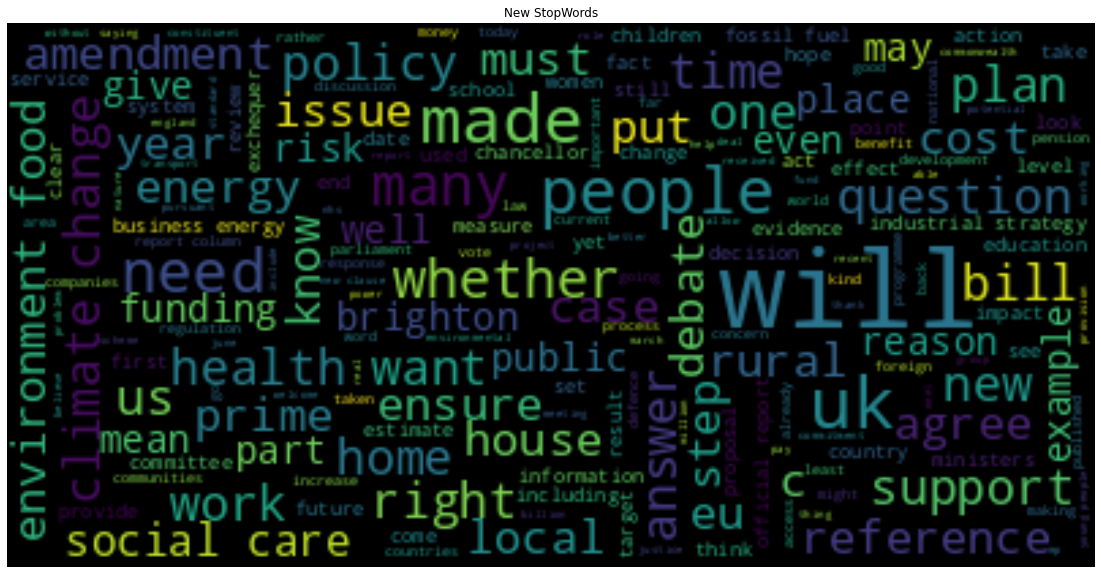

In [24]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=40, background_color="black")
wordcloud.stopwords = new_stopwords
wordcloud = wordcloud.generate('\n'.join(extracts).lower())
plt.figure( figsize=(20,10) )
plt.title("New StopWords")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


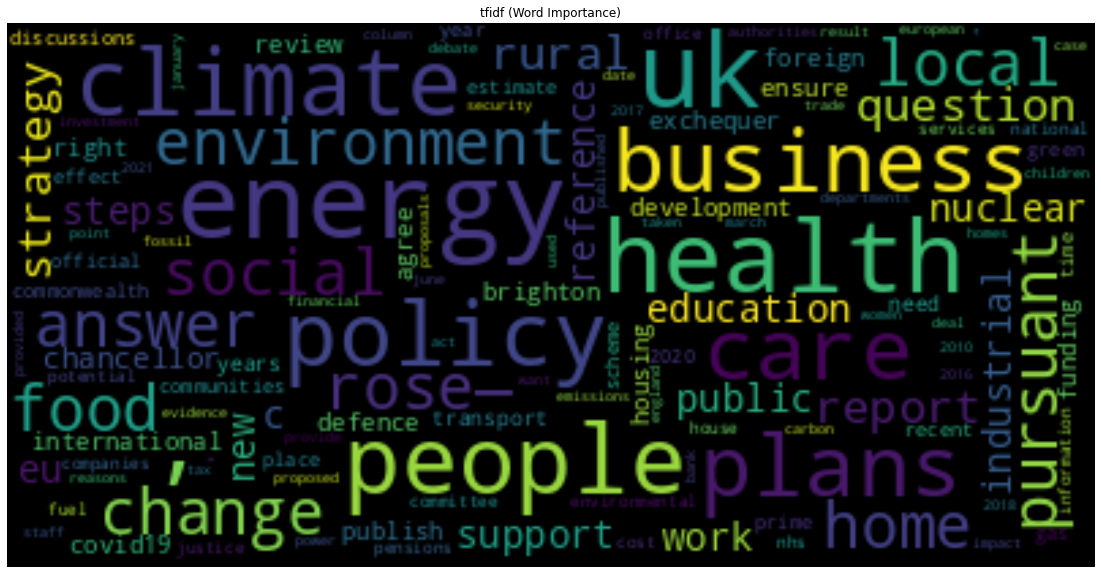

In [42]:

import matplotlib
import os
matplotlib.pyplot.savefig
wordcloud = WordCloud(max_font_size=40, background_color="black")
wordcloud.generate_from_frequencies(frequencies=D)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("tfidf (Word Importance)")
plt.axis("off")
plt.savefig(os.path.join('../writeup','test.jpeg'))
plt.show()


In [29]:
print(wordcloud.stopwords)

[]
